In [1]:
import importlib
import matplotlib.pyplot as plt
import os
import pickle
import photogrammetry as pg

# plt.style.use('seaborn-poster')
plt.style.use('default')

%matplotlib widget

In [2]:
importlib.reload(pg)

<module 'photogrammetry' from '/home/evanmayer/github/hotspot/verification/photogrammetry.py'>

In [3]:
# check for pickled camera matrices to avoid expensive recalibration
if not (
    os.path.exists('camera_cal_mtx.pickle') and
    os.path.exists('camera_cal_dist.pickle') and
    os.path.exists('camera_cal_optimal_camera_matrix.pickle')
):
    # calibrate the camera for distortion
    mtx, dist, optimal_camera_matrix, roi = pg.calibrate_camera(
        os.path.join('input', 'camera_cal', 'charuco_no_parallax'),
        method='charuco',
        plot=False
    )
    with open('camera_cal_mtx.pickle', 'wb') as f:
        pickle.dump(mtx, f, protocol=pickle.HIGHEST_PROTOCOL)
    with open('camera_cal_dist.pickle', 'wb') as f:
        pickle.dump(dist, f, protocol=pickle.HIGHEST_PROTOCOL)
    with open('camera_cal_optimal_camera_matrix.pickle', 'wb') as f:
        pickle.dump(optimal_camera_matrix, f, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('camera_cal_mtx.pickle', 'rb') as f:
        mtx = pickle.load(f)
    with open('camera_cal_dist.pickle', 'rb') as f:
        dist = pickle.load(f)
    with open('camera_cal_optimal_camera_matrix.pickle', 'rb') as f:
        optimal_camera_matrix = pickle.load(f)

In [4]:
importlib.reload(pg)
image_data_charuco = pg.find_targets(
    os.path.join('input', 'meas', 'charuco_9x9_.2x.2'),
    os.path.join('input', 'targets'),
    mtx,
    dist,
    optimal_camera_matrix,
    stride=8,
    plot=False
)

INFO:photogrammetry:Corner detection after de-distortion in input/meas/charuco_9x9_.2x.2/006.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/charuco_9x9_.2x.2/003.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/charuco_9x9_.2x.2/008.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/charuco_9x9_.2x.2/005.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/charuco_9x9_.2x.2/001.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/charuco_9x9_.2x.2/004.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/charuco_9x9_.2x.2/011.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/charuco_9x9_.2x.2/012.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/charuco_9x9_.2x.2/007.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/ch

In [5]:
# print(image_data_charuco)

In [6]:
plt.close('all')

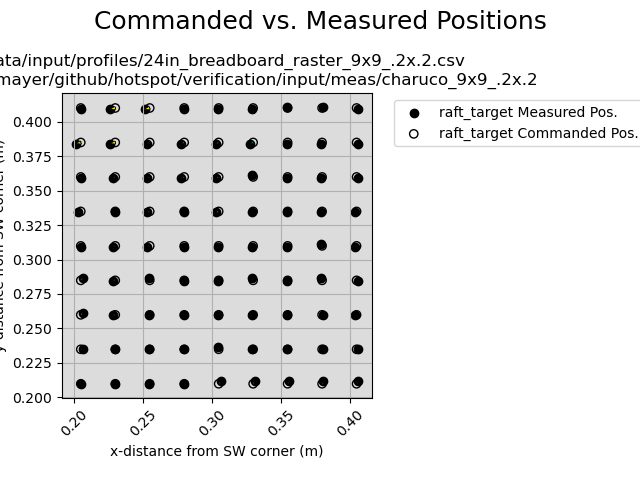

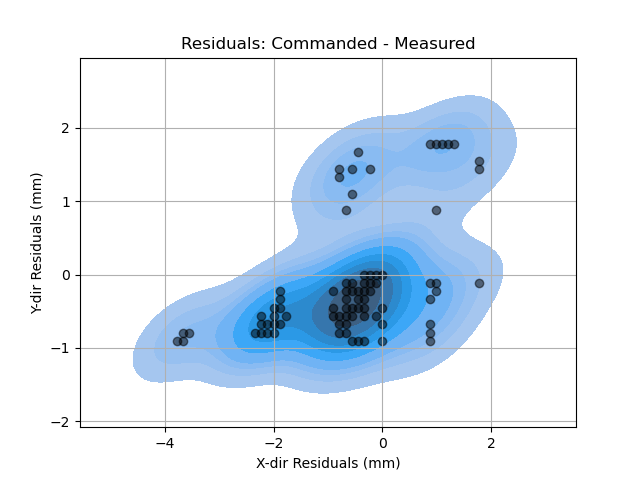

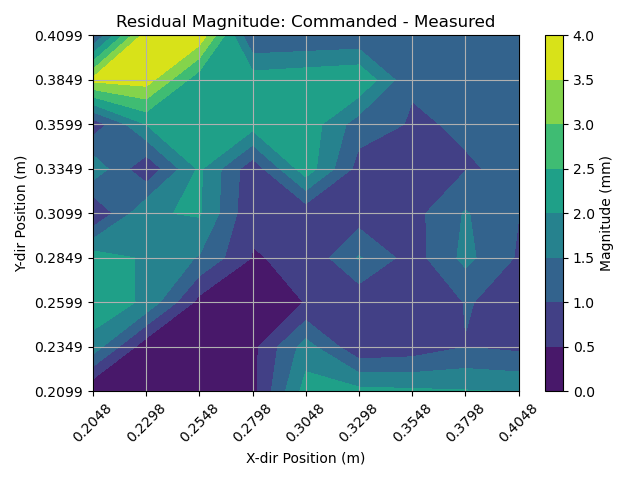

In [7]:
importlib.reload(pg)
command_file = os.path.join('..', 'data', 'input', 'profiles', '24in_breadboard_raster_9x9_.2x.2.csv')
pg.post_process_many_to_many(image_data_charuco, command_file)#, ref='SW', SW_offset=(.05822, .18449))
# pg.post_process_many_to_one(image_data_charuco)

In [8]:
xd = .2 # m
d = 3. # m
t = 0.014 # m
xd * (1 - (d - t) / d) # err

0.0009333333333333194